In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
data = pd.read_excel('AM0AM1_5.xls', header=1)
data.drop(data.columns[4], axis=1, inplace=True)
data

,Wavelength (nm),Extraterrestrial W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1,Wavelength (nm).1,W*m-2*nm-1
0,280.0,0.08200,4.730900e-23,2.536100e-26,119.5,0.000062
1,280.5,0.09900,1.230700e-21,1.091700e-24,120.5,0.000561
2,281.0,0.15000,5.689500e-21,6.125300e-24,121.5,0.004901
3,281.5,0.21200,1.566200e-19,2.747900e-22,122.5,0.001184
4,282.0,0.26700,1.194600e-18,2.834600e-21,123.5,0.000048
...,...,...,...,...,...,...
1997,3980.0,0.00884,7.387200e-03,7.404900e-03,NaN,NaN
1998,3985.0,0.00880,7.432700e-03,7.450300e-03,NaN,NaN
1999,3990.0,0.00878,7.372300e-03,7.389400e-03,NaN,NaN
2000,3995.0,0.00870,7.210000e-03,7.226300e-03,NaN,NaN


In [4]:
xmin, xmax = 350, 1175
step = 25

data1 = data[(data['Wavelength (nm)'] >= xmin) & (data['Wavelength (nm)'] <= xmax)]
data2 = data[(data['Wavelength (nm).1'] >= xmin) & (data['Wavelength (nm).1'] <= xmax)]

wavlens1 = data1['Wavelength (nm)']
ext = data1['Extraterrestrial W*m-2*nm-1']
global_tilt = data1['Global tilt  W*m-2*nm-1']
d_s = data1['Direct+circumsolar W*m-2*nm-1']

wavlens2 = data2['Wavelength (nm).1']
irr2 = data2['W*m-2*nm-1']

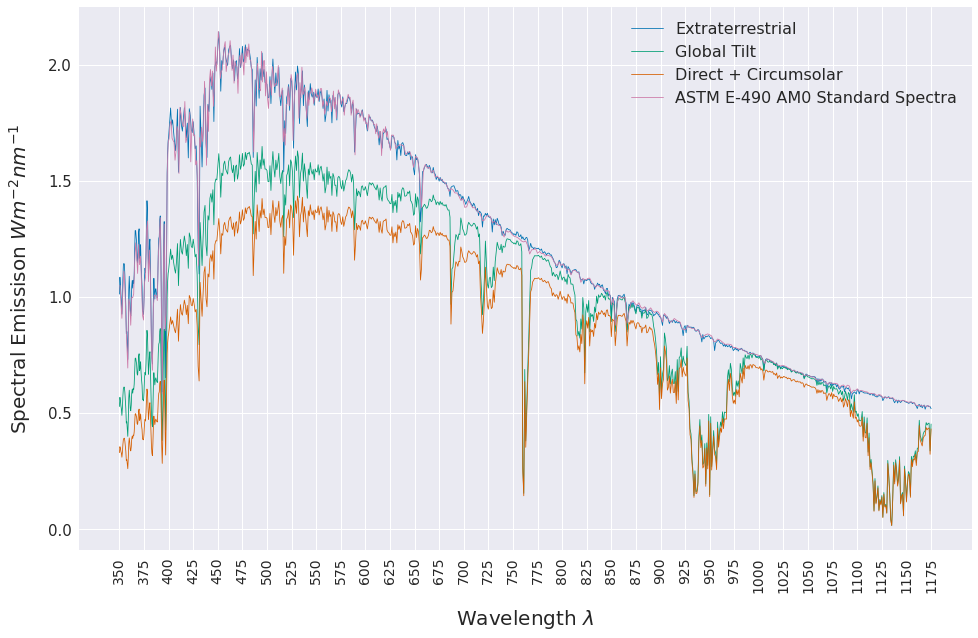

In [5]:
plt.figure(figsize=(16, 10))

plt.plot(wavlens1, ext, linewidth=0.8, label='Extraterrestrial')
plt.plot(wavlens1, global_tilt, linewidth=0.8, label='Global Tilt')
plt.plot(wavlens1, d_s, linewidth=0.8, label='Direct + Circumsolar')

plt.plot(wavlens2, irr2, linewidth=0.8, label='ASTM E-490 AM0 Standard Spectra')

plt.xlabel('Wavelength $\\lambda$', size=20, labelpad=15)
plt.ylabel('Spectral Emissison $W m^{-2} nm^{-1}$', size=20, labelpad=15)

plt.xticks(np.arange(xmin, xmax + step, step), size=14, rotation=90)
plt.yticks(size=15)

plt.legend(fontsize=16)

In [6]:
sky10_100ms_20_ep = pd.read_csv('sky10_100ms_20_ep.csv')
sky10_100ms_20_ep = sky10_100ms_20_ep[(sky10_100ms_20_ep['wavelength'] >= xmin) & (sky10_100ms_20_ep['wavelength'] <= xmax)]
sky10_100ms_20_ep

,wavelength,counts
22,350.0,1480.0
23,350.5,1470.0
24,351.0,1450.0
25,351.5,1430.0
26,352.0,1420.0
...,...,...
1668,1173.0,1280.0
1669,1173.5,1290.0
1670,1174.0,1290.0
1671,1174.5,1290.0


(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

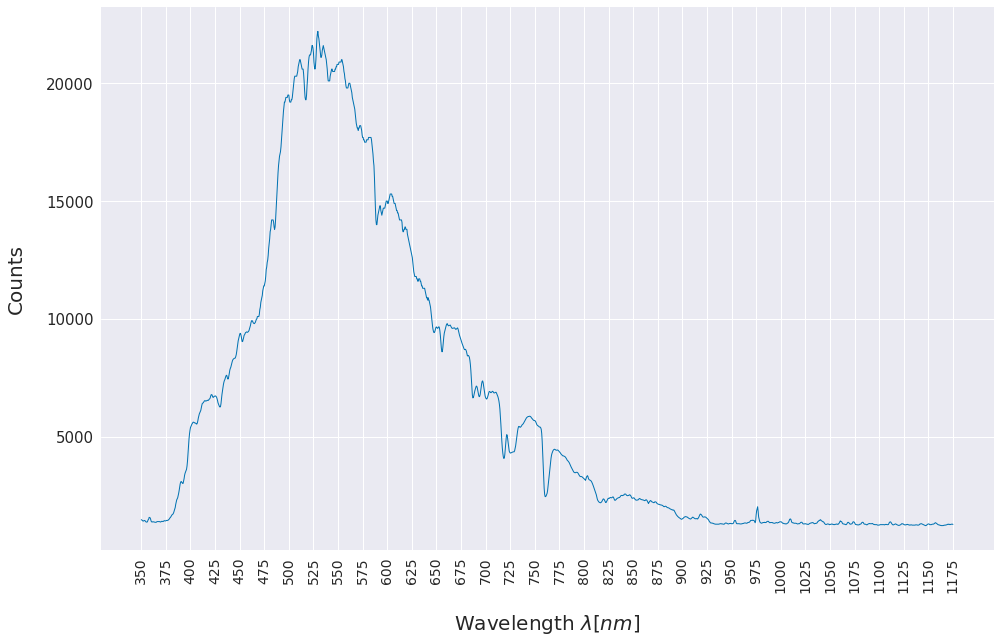

In [7]:
wavlens = sky10_100ms_20_ep['wavelength']
counts = sky10_100ms_20_ep['counts']

plt.figure(figsize=(16, 10))

plt.plot(wavlens, counts, linewidth=1)

plt.xlabel('Wavelength $\\lambda [nm]$', size=20, labelpad=20)
plt.ylabel('Counts', size=20, labelpad=20)

plt.xticks(np.arange(wavlens.min(), wavlens.max() + step, step), size=14, rotation=90)
plt.yticks(size=15)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

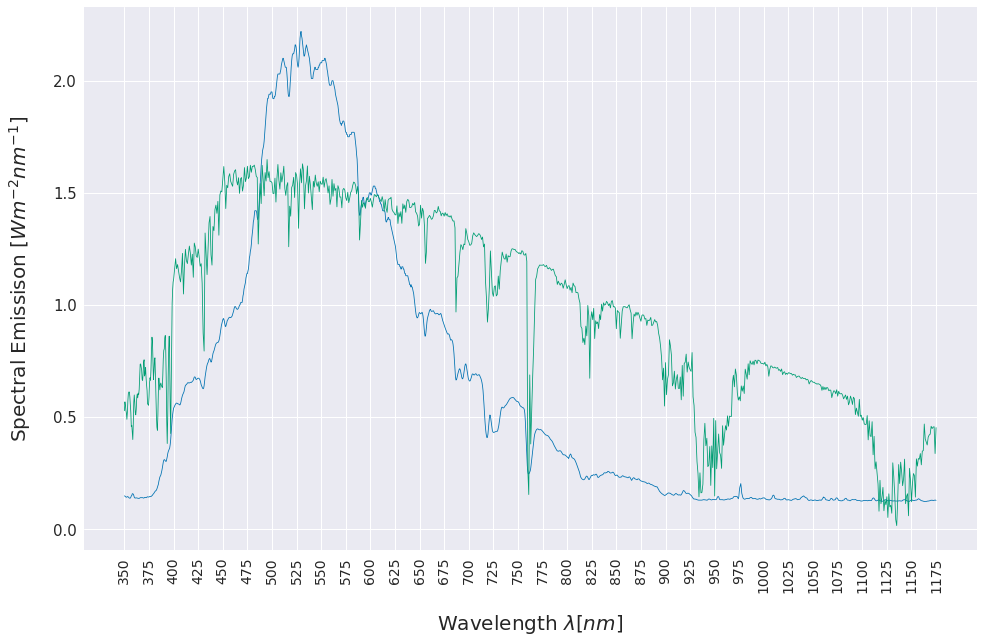

In [8]:
plt.figure(figsize=(16, 10))

plt.plot(wavlens, counts * 0.0001, linewidth=0.8, label='Experimental Data')
plt.plot(wavlens1, global_tilt, linewidth=0.8, label='ASTM E-490 AM0 Standard Spectra')

plt.xlabel('Wavelength $\\lambda [nm]$', size=20, labelpad=20)
plt.ylabel('Spectral Emissison $[W m^{-2} nm^{-1}]$', size=20, labelpad=20)

plt.xticks(np.arange(wavlens.min(), wavlens.max() + step, step), size=14, rotation=90)
plt.yticks(size=15)

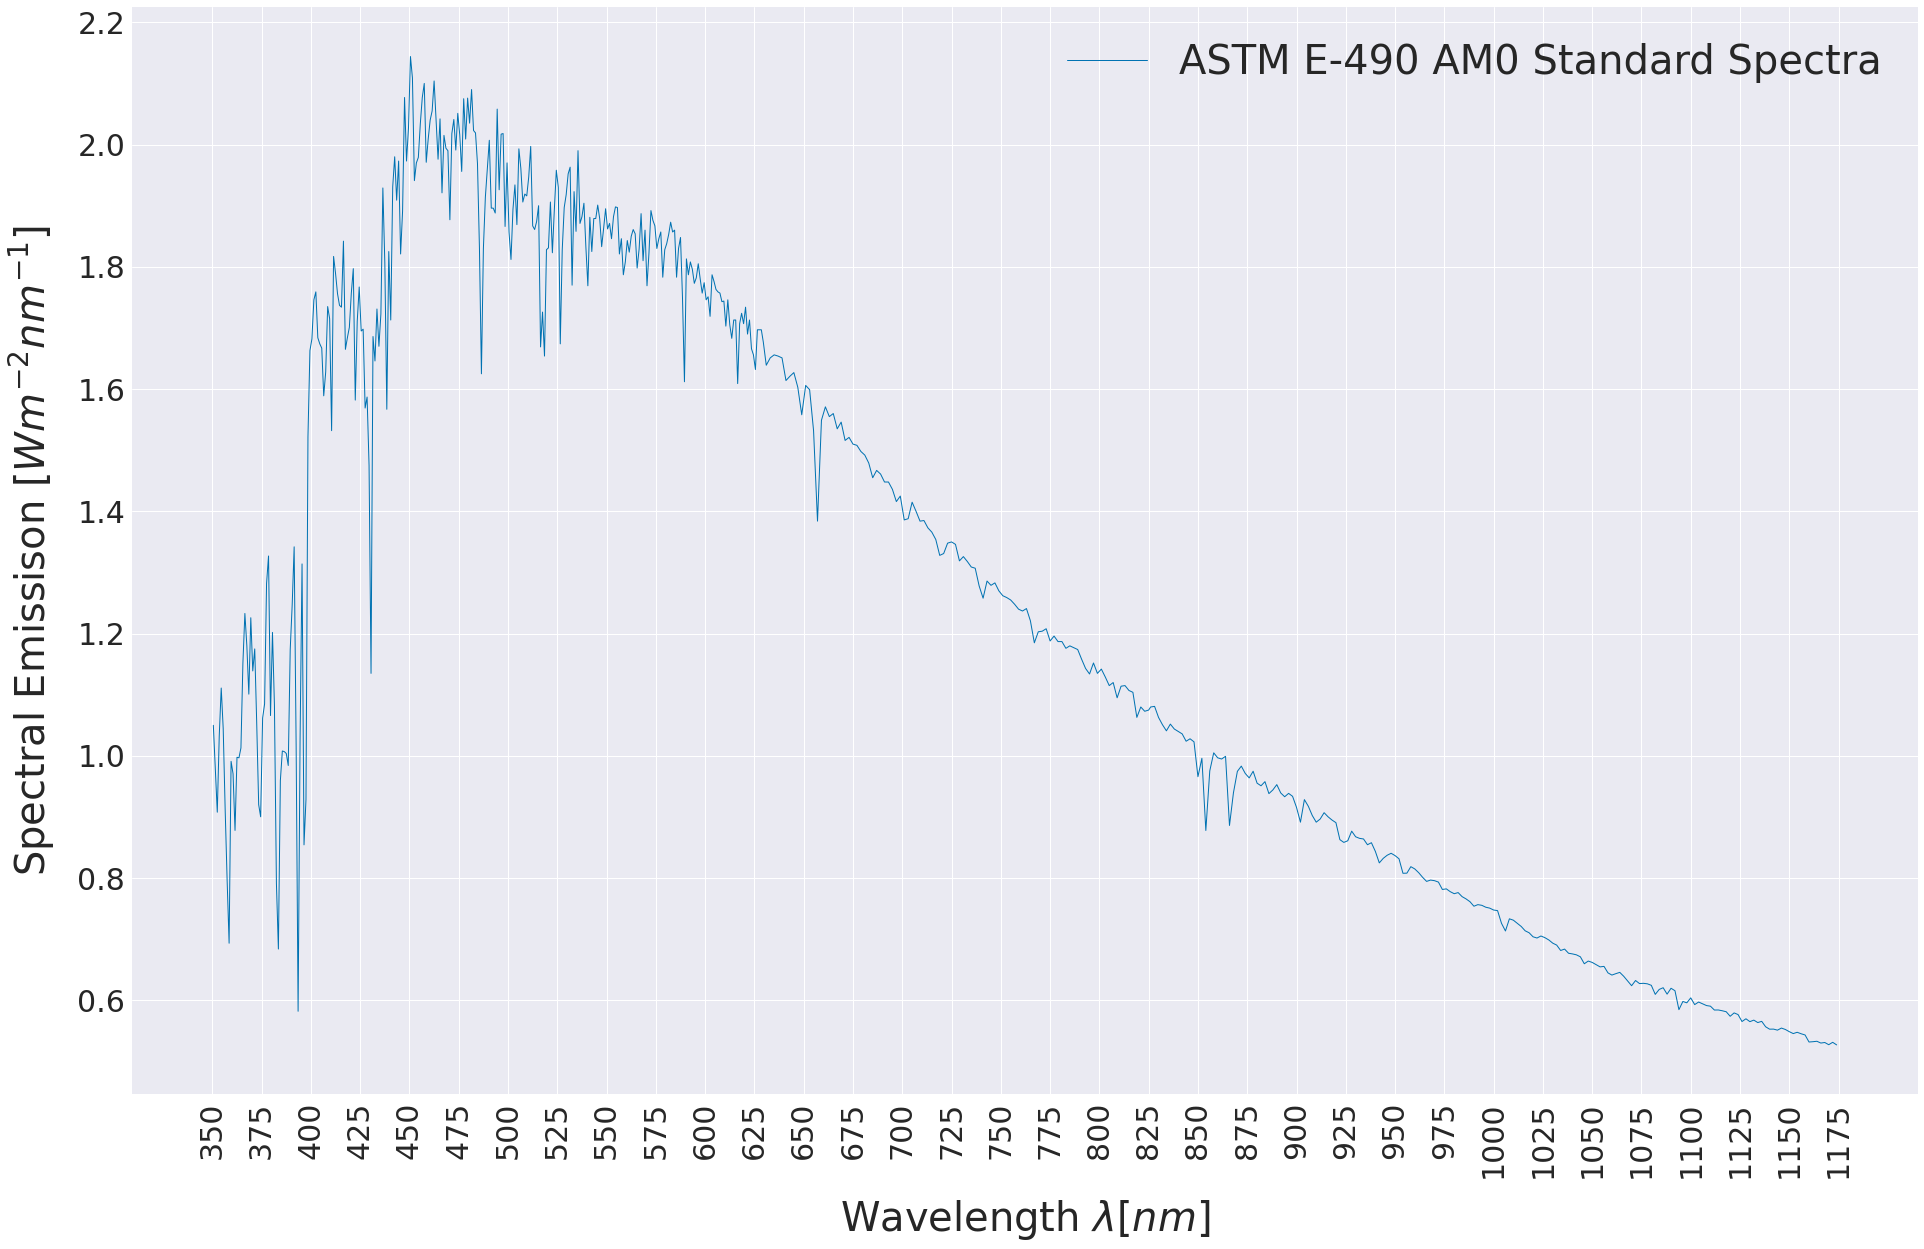

In [17]:
plt.figure(figsize=(32, 20))

plt.plot(wavlens2, irr2, linewidth=1, label='ASTM E-490 AM0 Standard Spectra')

plt.xlabel('Wavelength $\\lambda [nm]$', size=40, labelpad=20)
plt.ylabel('Spectral Emissison $[W m^{-2} nm^{-1}]$', size=40, labelpad=20)

plt.xticks(np.arange(wavlens.min(), wavlens.max() + step, step), size=30, rotation=90)
plt.yticks(size=30)

plt.legend(prop={'size':40})